http://server.arcgisonline.com/ArcGIS/rest/services/ESRI_Imagery_World_2D/MapServer/export?bbox=-126.0,29.999999999999996,-114.00000000000001,45.0&bboxSR=4326&imageSR=4326&size=2500,3125&dpi=96&format=png32&transparent=true&f=image


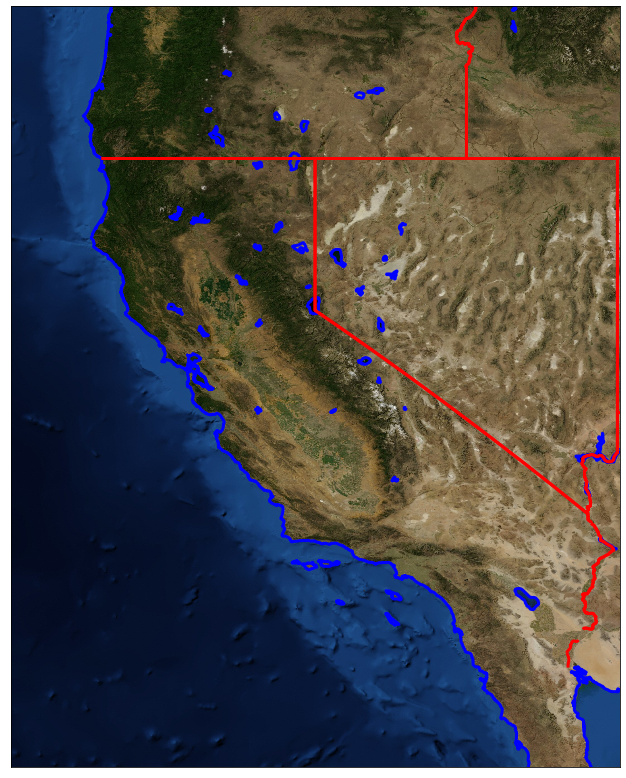

In [8]:
# Nessecary Imports
import matplotlib.pyplot as plt
from mpl_toolkits.basemap import Basemap

# Make the figure
plt.figure(figsize=(14,14))

# Initialize the basemap
m = Basemap(llcrnrlat = 30, llcrnrlon = -126, urcrnrlat = 45, urcrnrlon = -114,resolution='h')

# Get the area of interest imagery
m.arcgisimage(service='ESRI_Imagery_World_2D', xpixels=2500, verbose= True,alpha=.6)

# Draw the coasts
m.drawcoastlines(color='blue', linewidth=3)

# Draw the states
m.drawstates(color='red',linewidth=3)

C:\Users\ShinYJ\Anaconda3\lib\site-packages\pandas\core\series.py:853: RuntimeWarning: divide by zero encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)
C:\Users\ShinYJ\Anaconda3\lib\site-packages\pandas\core\series.py:853: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
C:\Users\ShinYJ\Anaconda3\lib\site-packages\matplotlib\collections.py:857: RuntimeWarning: invalid value encountered in sqrt
  scale = np.sqrt(self._sizes) * dpi / 72.0 * self._factor


Text(0.5, 1.0, 'California Cities: Density and Population')

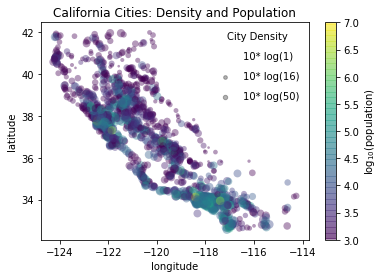

In [2]:
import pandas as pd
import numpy as np
# Read in data on all cities https://simplemaps.com/data/us-cities
cities = pd.read_csv('data_geo/uscities.csv')
cities[:5]
# Choose only cities in california
cities = cities.loc[cities.state_id == 'CA',:]
# Get all the data from the dataframe
lat, lon = cities['lat'], cities['lng']
population, density = cities['population'], cities['density']
# Scatter the points, using size and color but no label
plt.scatter(lon, lat, label=None,
c=np.log10(population), s=10*np.log(density),
cmap='viridis', linewidths=0, alpha=.4)
plt.axis(aspect='equal')
plt.xlabel('longitude')
plt.ylabel('latitude')
plt.colorbar(label='log$_{10}$(population)')
plt.clim(3, 7)
# make a guide for the user
for density in [1,50//3,50]:
    plt.scatter([], [], c='k', alpha=0.3, s=5*np.log(density),label='10* log('+str(density)+')')
plt.legend(scatterpoints=1, frameon=False, labelspacing=1, title='City Density')
# add a title
plt.title('California Cities: Density and Population')

http://server.arcgisonline.com/ArcGIS/rest/services/ESRI_Imagery_World_2D/MapServer/export?bbox=-126.0,29.999999999999996,-114.00000000000001,45.0&bboxSR=4326&imageSR=4326&size=2500,3125&dpi=96&format=png32&transparent=true&f=image


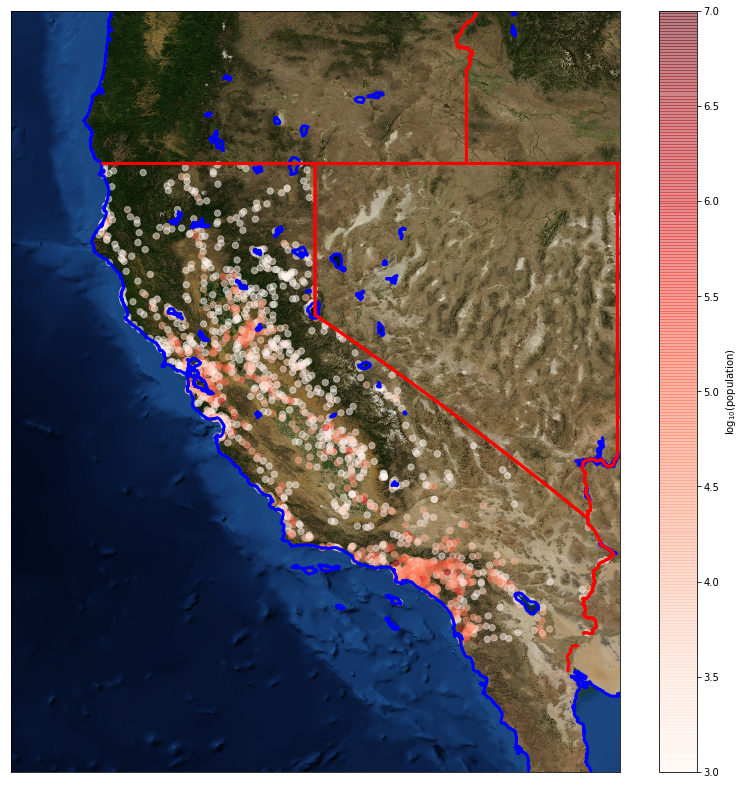

In [3]:
# PCH
import os
os.environ['PROJ_LIB']='/Users/nbeyond/anaconda3/share/proj/'
## For basemap install using conda
##
#conda install basemap-data-hires
# Nessecary Imports
import matplotlib.pyplot as plt
from mpl_toolkits.basemap import Basemap
# Make the figure
plt.figure(figsize=(14,14))
# Initialize the basemap
m = Basemap(llcrnrlat = 30, llcrnrlon = -126, urcrnrlat = 45, urcrnrlon = -114,resolution='h')
# Get the area of interest imagery
m.arcgisimage(service='ESRI_Imagery_World_2D', xpixels=2500, verbose= True,alpha=.6)
# Draw the coasts
m.drawcoastlines(color='blue', linewidth=3)
# Draw the states
m.drawstates(color='red',linewidth=3)
m.scatter(lon, lat, latlon=True,
c=np.log10(population), s=10*np.log(density),
cmap='Reds', alpha=.5)
# 3. create color bar and legend
plt.colorbar(label=r'$\log_{10}({\rm population})$')
plt.clim(3, 7)

In [4]:
def make_folder_name(localtime):
    if localtime.tm_hour > 12:
        string = str(localtime.tm_mon)+'_'+str(localtime.tm_mday)+'__'+str(localtime.tm_hour-12)+'-'+str(localtime.tm_min)+'_pm'
    else:
        string = str(localtime.tm_mon)+'_'+str(localtime.tm_mday)+'_'+str(localtime.tm_hour)+'-'+str(localtime.tm_min)+'_am'
    return string

import zipfile
import requests
import time
#names of the datasets and their respective links
names = ['24hrModis1km','48hrModis1km','7dModis1km']
links = ['https://firms.modaps.eosdis.nasa.gov/active_fire/c6/shapes/zips/MODIS_C6_USA_contiguous_and_Hawaii_24h.zip',
'https://firms.modaps.eosdis.nasa.gov/active_fire/c6/shapes/zips/MODIS_C6_USA_contiguous_and_Hawaii_48h.zip',
'https://firms.modaps.eosdis.nasa.gov/active_fire/c6/shapes/zips/MODIS_C6_USA_contiguous_and_Hawaii_7d.zip']
folder_names = []
localtime = time.localtime(time.time())
# Save the data into the right spot
# Go through each and link
for i,name_Link in enumerate(zip(names,links)):
    # download the file contents in binary format
    r = requests.get(name_Link[1])
    # open method to open a file on your system and write the contents
    with open(name_Link[0], "wb") as code:
        code.write(r.content)
    # Unzip the data
    zip_ref = zipfile.ZipFile(name_Link[0], 'r')
    name = make_folder_name(localtime)+'_'+name_Link[0]
    folder_names.append(name)
    zip_ref.extractall(name)
    zip_ref.close()

C:\Users\ShinYJ\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: DeprecationWarning: Using Nominatim with the default "geopy/1.20.0" `user_agent` is strongly discouraged, as it violates Nominatim's ToS https://operations.osmfoundation.org/policies/nominatim/ and may possibly cause 403 and 429 HTTP errors. Please specify a custom `user_agent` with `Nominatim(user_agent="my-application")` or by overriding the default `user_agent`: `geopy.geocoders.options.default_user_agent = "my-application"`. In geopy 2.0 this will become an exception.
  """


fetching image
http://server.arcgisonline.com/ArcGIS/rest/services/ESRI_Imagery_World_2D/MapServer/export?bbox=-126.0,29.999999999999996,-114.00000000000001,45.0&bboxSR=4326&imageSR=4326&size=2500,3125&dpi=96&format=png32&transparent=true&f=image
adding indicators


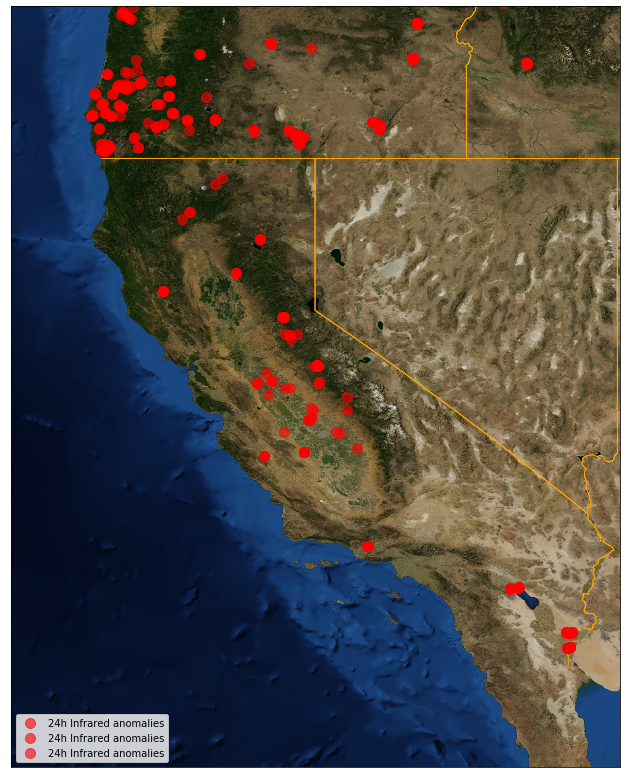

In [7]:
import matplotlib.pyplot as plt
from mpl_toolkits.basemap import Basemap
import shapefile
from geopy.geocoders import Nominatim
geolocator = Nominatim()
plt.figure(figsize=(14, 14))
m = Basemap(llcrnrlat = 30,llcrnrlon = -126,urcrnrlat = 45,urcrnrlon = -114,resolution='h')
print('fetching image')
m.arcgisimage(service='ESRI_Imagery_World_2D', xpixels = 2500, verbose=True,alpha= .6)


# Draw the states
m.drawstates(color='orange',linewidth=1)
print('adding indicators')
names2 =['MODIS_C6_USA_contiguous_and_Hawaii_24h','MODIS_C6_USA_contiguous_and_Hawaii_48h','MODIS_C6_USA_contiguous_and_Hawaii_7d']
i=1
for name,name1 in (zip(reversed(folder_names),reversed(names2))):
    shpFilePath = name+'/'+name1
    listx=[]
    listy=[]
    test = shapefile.Reader(shpFilePath)
    for sr in test.shapeRecords():
         x,y = (sr.shape.points[0])
         listx.append(x)
         listy.append(y)
    x,y = m(listx,listy)
    if i == 1:
         Color = 'r'
         Label = '24h Infrared anomalies'
         a = .6
         m.plot(x, y, 'o',color = Color, markersize=10,alpha = a,label=Label)
    if i == 2:
         Color = 'b'
         Label = '48h Infrared anomalies'
         a = .5
         m.plot(x, y, 'o',color = Color, markersize=8,alpha = a,label=Label)
    if i == 3:
         Color = 'g'
         Label = '7d Infrared anomalies'
         a = .2
         m.plot(x, y, 'o',color = Color, markersize=6,alpha = a,label=Label)
i = i + 1
plt.legend()